In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [87]:
df = pd.read_csv("vgsales.csv")
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [89]:
print(df.describe().round(2))

           Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
count  16598.00  16327.00  16598.00  16598.00  16598.00     16598.00   
mean    8300.61   2006.41      0.26      0.15      0.08         0.05   
std     4791.85      5.83      0.82      0.51      0.31         0.19   
min        1.00   1980.00      0.00      0.00      0.00         0.00   
25%     4151.25   2003.00      0.00      0.00      0.00         0.00   
50%     8300.50   2007.00      0.08      0.02      0.00         0.01   
75%    12449.75   2010.00      0.24      0.11      0.04         0.04   
max    16600.00   2020.00     41.49     29.02     10.22        10.57   

       Global_Sales  
count      16598.00  
mean           0.54  
std            1.56  
min            0.01  
25%            0.06  
50%            0.17  
75%            0.47  
max           82.74  


In [88]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [91]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
df.dropna(subset=["Year"], inplace=True)
df["Publisher"].fillna("Unknown", inplace=True)
df["Year"] = df["Year"].astype(int)

C:\Users\rafab\AppData\Local\Temp\ipykernel_1928\1355244048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Publisher"].fillna("Unknown", inplace=True)


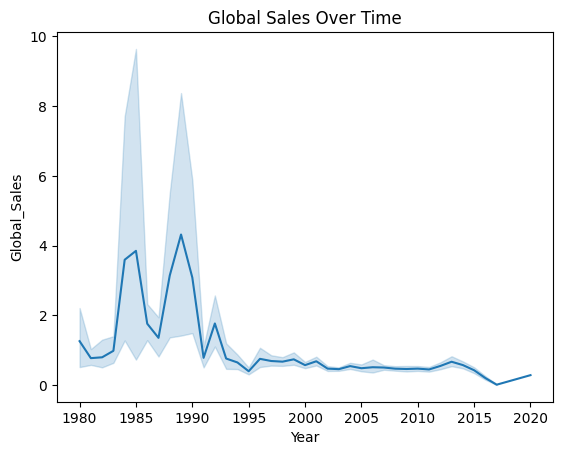

In [153]:
sns.lineplot(df, x='Year', y='Global_Sales')
plt.title('Global Sales Over Time')
plt.show()

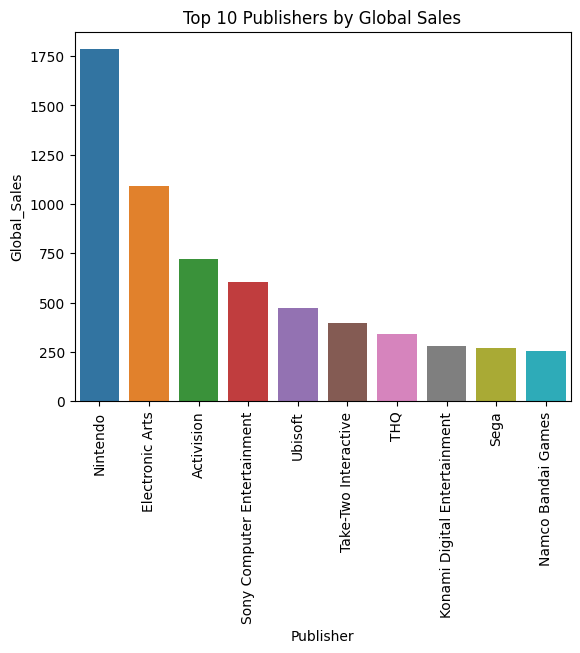

In [181]:
top10 = df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head(10)

sns.barplot(x=top10.index, y=top10['Global_Sales'], hue=top10.index)
plt.xticks(rotation=90)
plt.title('Top 10 Publishers by Global Sales')
plt.show()

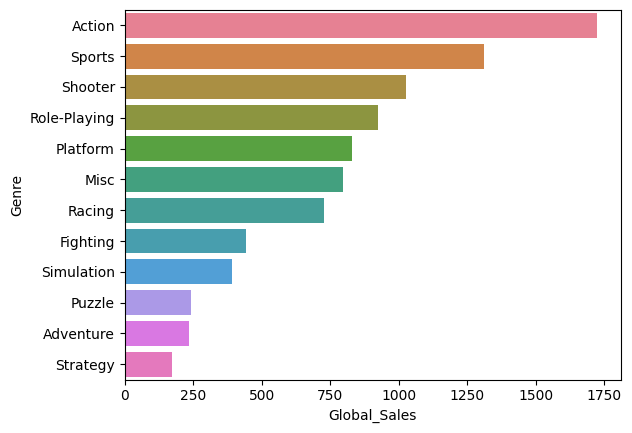

In [193]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
genre_sales = genre_sales.sort_values(by="Global_Sales", ascending=False)
sns.barplot(genre_sales, x="Global_Sales", y="Genre", hue="Genre")
plt.show()